Mean Squared Error: 19478.546522392466


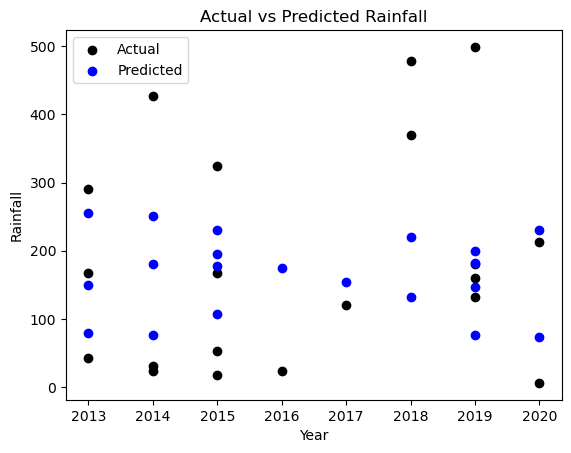

Predicted Rainfall for the Next 3 Years:
    Year  Month  Predicted Rainfall
0   2021      1           52.124874
1   2021      2           69.640524
2   2021      3           87.156174
3   2021      4          104.671824
4   2021      5          122.187475
5   2021      6          139.703125
6   2021      7          157.218775
7   2021      8          174.734426
8   2021      9          192.250076
9   2021     10          209.765726
10  2021     11          227.281377
11  2021     12          244.797027
12  2022      1           48.701892
13  2022      2           66.217542
14  2022      3           83.733193
15  2022      4          101.248843
16  2022      5          118.764493
17  2022      6          136.280143
18  2022      7          153.795794
19  2022      8          171.311444
20  2022      9          188.827094
21  2022     10          206.342745
22  2022     11          223.858395
23  2022     12          241.374045
24  2023      1           45.278910
25  2023      2        

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('colo.csv')

X = data[['Year', 'Month']]
y = data['Rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_test['Year'], y_test, color='black', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='blue', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()

future_years = [2021, 2022, 2023]
future_months = range(1, 13)
future_data = pd.DataFrame([(year, month) for year in future_years for month in future_months], columns=['Year', 'Month'])

future_data.to_csv('future_data.csv', index=False)

future_data = pd.read_csv('future_data.csv')

future_data['Predicted Rainfall'] = model.predict(future_data[['Year', 'Month']])

print('Predicted Rainfall for the Next 3 Years:')
print(future_data[['Year', 'Month', 'Predicted Rainfall']])
